In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [32]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [9]:
path = './data/'
data_name = 'training.1600000.processed.noemoticon.csv'
full_name = path + data_name
df = pd.read_csv(full_name)

In [35]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [82]:
pos_df = df[df['target'] == 4]
neg_df = df[df['target'] == 0]

In [83]:
pos_df['text'] = pos_df['text'].str.split()

/var/folders/05/2lrg20wj3k1dfc7p1z7789w40000gn/T/ipykernel_67399/717200677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_df['text'] = pos_df['text'].str.split()


In [84]:
pos_df

,target,id,date,flag,user,text
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,"[I, LOVE, @Health4UandPets, u, guys, r, the, b..."
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,"[im, meeting, up, with, one, of, my, besties, ..."
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"[@DaRealSunisaKim, Thanks, for, the, Twitter, ..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,"[Being, sick, can, be, really, cheap, when, it..."
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,"[@LovesBrooklyn2, he, has, that, effect, on, e..."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,"[Just, woke, up., Having, no, school, is, the,..."
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,"[TheWDB.com, -, Very, cool, to, hear, old, Wal..."
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,"[Are, you, ready, for, your, MoJo, Makeover?, ..."
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,"[Happy, 38th, Birthday, to, my, boo, of, alll,..."


In [85]:
pos_df = pos_df.explode(column=['text'])

In [86]:
pos_df = pos_df['text'].str.lower()

In [87]:
pos_df

800000                    i
800000                 love
800000     @health4uandpets
800000                    u
800000                 guys
                 ...       
1599999               happy
1599999     #charitytuesday
1599999           @thenspcc
1599999      @sparkscharity
1599999      @speakinguph4h
Name: text, Length: 10215552, dtype: object

In [100]:
pos_df_cnt = pos_df.value_counts()
pos_dict = pos_df_cnt.to_dict()

In [101]:
for s_word in STOPWORDS:
    pos_dict.pop(s_word, None)

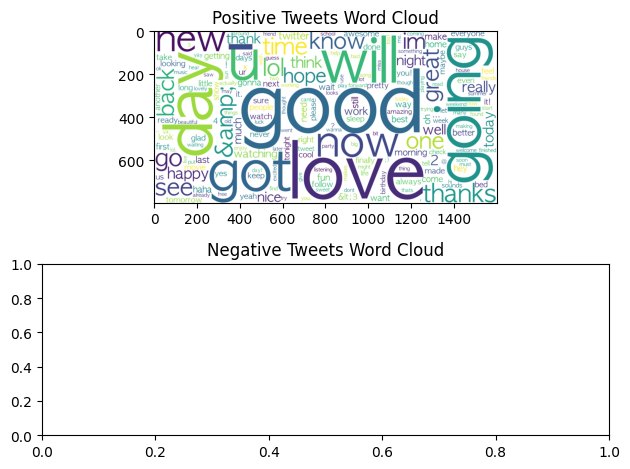

In [103]:
plt.subplot(211)
wc = WordCloud(
    font_path='AppleGothic',
    max_words=200,
    stopwords=STOPWORDS,
    height=800,
    width=1600,
    background_color='white'
    )
pos_wc_img = wc.generate_from_frequencies(pos_dict)
plt.imshow(pos_wc_img)
plt.title('Positive Tweets Word Cloud')
plt.subplot(212)
plt.title('Negative Tweets Word Cloud')
plt.tight_layout();